# Applying derivatives to analyze functions


## Introduction

Inspired from [this](https://youtu.be/lDY9JcFaRd4) video from Khan Academy.

Here we will have a quick glance on the basics of finding maxima and minima of a given function. 

Maxima - plural of maximum
Minima - plural of minimum
$[a,b]$ - closed interval - includes a and b
$(a,b)$ - open interval - excludes a and b


## Critical Points

Given a function $f(x)$, 

In [11]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


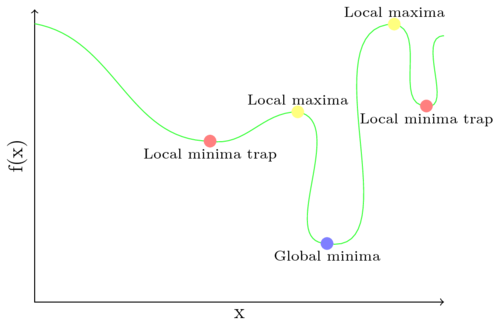

In [12]:
%%tikz -s 500,500
% https://tex.stackexchange.com/questions/371999/minima-of-smooth-curve
\coordinate (bottom) at (5,1);
\coordinate (lmen) at (3 , 2.75);
\coordinate (lman) at (4.5 , 3.25);
\coordinate (rmen) at (6.7,3.35);
\coordinate (rman) at (6.15,4.75);
\coordinate (lkant) at (0,4.756);
\coordinate (rkant) at (7,4.55);
\coordinate (o) at (0,0);
\coordinate (x) at (7,0);
\coordinate (y) at (0,5);


\draw [<->] (y) -- node [rotate=90, above] {f(x)} (o) -> node [below] {x} (x);
\draw [green!80, in=180, out=0, tension=.1]
  (lkant)[out=-10] to (lmen) to (lman) to (bottom) to (rman) to (rmen) to (rkant);

\filldraw[color = blue!50] (bottom) circle  (0.1) node [below,color=black] {\scriptsize Global minima};
\filldraw [color = red!50] (lmen) circle (0.1) node [below,color=black] {\scriptsize Local minima trap};
\filldraw [color = red!50] (rmen) circle (0.1) node [below,color=black] {\scriptsize Local minima trap};
\filldraw [color = yellow!50] (lman) circle (0.1) node [above,color=black] {\scriptsize Local maxima};
\filldraw [color = yellow!50] (rman) circle (0.1) node [above,color=black] {\scriptsize Local maxima};

1. There could be a **global maximum and a minimum** point. Global in the sense, inside the _interval_, it is the maximum or minimum out of all peaks or valleys. 
2. There are areas, which are **local maximum or minium** around those areas. There could more than one local maximum or minimum points within the interval. 
3. The slopes at these points are 0 or also _undefined_ (sharp turn), that is $f'(x) = 0$ at these points. All these points are called **critical points**. 
4. Suppose the interval is \[a,b\]. Then the **end points** are $a$ and $b$ are not critical points, because anyway $f'(a)$ and $f'(b)$ would be 0 or undefined.  
5. Not all critcal points, which have slope 0, becomes a global or local maximum or minimum point. It could have just flattened. 

## Decreasing or Increasing Interval 

Inspired from [this](https://youtu.be/KblYjo1Ijws) video from Khan Academy.

#### Decreasing interval

Suppose $f(x) = x^5(x - 3)$. Below is how the function looks like. We need to find the interval within which the function is decreasing. Just by eyeballing, we could know that the green area is where the function is decreasing, but we are not clear of the exact intervals. This would could find mathematically. 

In [13]:
preamble = '''
    \pgfplotsset{width=8cm,compat=newest}
'''

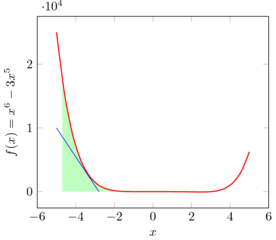

In [14]:
%%tikz -p pgfplotstable -x $preamble
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^6 - 3x^5$},
]

\addplot [draw=none, fill=green!25, domain=-4.7:3] {x^6 - 3*(x^5)} \closedcycle;  %shade area
\addplot[color=red,smooth,thick,-] {x^6 - 3*(x^5)};    % actual curve
\addplot[mark=none, blue] coordinates {(-2.8,0) (-5,10000)};  %tangent line
\end{axis}

Note that, any tangent line drawn on the curve in the green area will have a negative slope as shown by a blue line. This means, $f'(x) < 0$ in those areas. This is the clue. Finding the derivatives, we get

$$
\begin{aligned}
f'(x) = 6x^5 - 15x^4 \\
f'(x) < 0 \implies (6x^5 - 15x^4) < 0 \implies (3x^4)(2x-5) < 0 \\
\end{aligned}
$$

But $3x^4 >0$ always for any x due to even power, so only possibility should be $(2x-5) < 0$ or $x < 2.5$. This means the exact interval where function is decreasing is $-\infty < x < 2.5$. Below is the python implementation of the curve with tangent. 

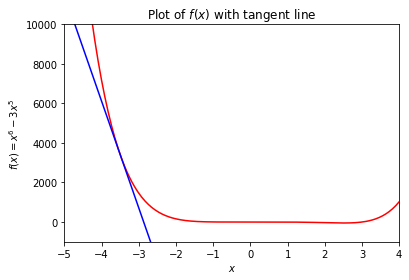

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def deriv(f,x):

    h = 0.000000001                 #step-size 
    return (f(x+h) - f(x))/h        #definition of derivative

def tangent_line(f,x_0,a,b):
    x = np.linspace(a,b,200)
    y = f(x) 
    y_0 = f(x_0)
    y_tan = deriv(f,x_0) * (x - x_0) + y_0 

    #plotting
    plt.plot(x,y,'r-')
    plt.plot(x,y_tan,'b-')
    plt.axis([a,b,a,b])
    plt.xlabel('$x$')     
    plt.ylabel('$f(x) = x^6 - 3x^5$')    
    plt.ylim([-1000,10000])
    plt.title('Plot of $f(x)$ with tangent line') 
    plt.show()   
    
def f2(x):
    return (x**6 - 3*(x**5))

tangent_line(f2,-3.5,-5,4)

Similarly we could also see where $x >  2.5$, the curve is increasing. Summarizing, 

## Flat Traps

As said earlier, not all critical points are either global or local maxima or minima. The flat regions might trick one to thin that is a maximum or minimum point. This is where, a small test around the critical point becomes important. Taking a small interval of values around the point, and depending on if $f'(x)$ is increasing or decreasing below and above the point, one could conclude if that critical point was just a flat or extrema (let us refer all critical points which qualify as maximum or minimum as extremum). Refer [1](https://youtu.be/x09FpMmGB4A), [2](https://youtu.be/-ihDprWkcY8) and practice in same session. 

## Absolute Minima or Maxima (entire domain)

We already saw a hint to avoid flat traps which we could use to identify the extremum points. Imagine a function like below $f(x) = x^2$. Just by eyeballing we could say, it decreases for interval $x = (-\infty,0)$ and increases for $x = (0, \infty)$. So the absolute minimum happens at $x=0$, but how do we prove that mathematically. 

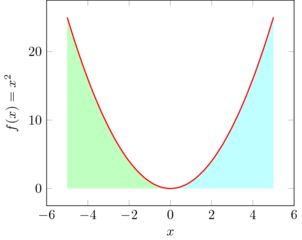

In [16]:
%%tikz -p pgfplotstable -x $preamble
\begin{axis}[
  xlabel=$x$,
  ylabel={$f(x) = x^2$},
]

\addplot [draw=none, fill=green!25, domain=-5:0] {x^2} \closedcycle;  %shade area
\addplot [draw=none, fill=cyan!25, domain=0:5] {x^2} \closedcycle;  %shade area
\addplot[color=red,smooth,thick,-] {x^2};    % actual curve
\end{axis}

We know when the slope is negative, the function is decreasing, and increasing if positive. We could just take a value before and after our critical point, and see if that is the case, to decide if the critical point is minimum or maximum. Let us first find the critical point for $f(x)=x^2$ in the interval $[-\infty, \infty]$. Note, this interval should either be explicitly or implicity defined before we try assessing the critical points. Here, we are able to take entire infinite range because of the ever increasing nature of the function before and after critical point. 

$$
f'(x) = 2x
$$  

When $x < 0$, for eg, $x=-2$, then $f'(x) = 2(-2) = -4 < 0$, so its decreasing.  
When $x > 0$, for eg, $x=2$, then $f'(x) = 2(2) = 4 > 0$, so its increasing. 

Thus, we infer, before critical point, the given function $x^2$ is decreasing, and after critical point, the given function $x^2$ is increasing. Thus the critical point should be a minimum. Since this is in entire domain, this is an absolute minimum point for the function $x^2$. Refer [1](https://youtu.be/Xhc7Hens0f8) for another example where the domain is implicit in the function.  

If we get more than 1 critical point within the interval, then simply taking the maximum of all the $f(x)$ values at those critical points, will give absolute or global maximum point. 

## Concavity

It is tedious every time to take values around the first derivative so let us try an easier method of taking second derivative. 

Let $f(x) = x(x-3)^2$. The function, and its derivatives will look like below. 

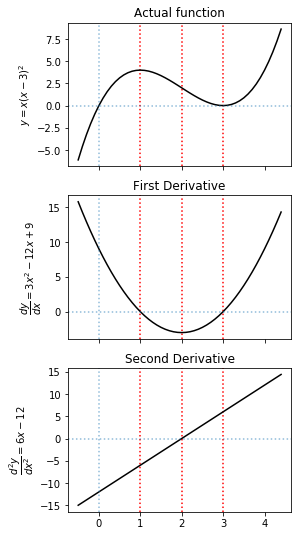

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# ref: https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs
# eq.ref: https://www.quora.com/How-can-a-second-derivative-be-equal-to-zero-at-a-maximum-Shouldnt-it-always-be-less-than-zero
fig = plt.figure(figsize=(4,9)) 

x = np.arange(-0.5,4.5,0.1)
y1 = x*((x-3)**2)
y2 = 3*x**2 - 12*x + 9
y3 = 6*x - 12
yn = (y1,y2,y3)
ytitle = [  r"$y = x(x-3)^2$", 
            r"$\dfrac{dy}{dx} = 3x^2 -12x + 9$", 
            r"$\dfrac{d^2y}{dx^2} = 6x - 12$"
         ]
title = [
            'Actual function',
            'First Derivative',
            'Second Derivative'
        ]

for i,y in enumerate(yn):    
    ax = fig.add_subplot(len(yn),1,i+1)
    ax.plot(x, y,ls='solid', color='black', zorder=1) 
    if i != len(yn) - 1: 
        ax.set_xticklabels( () )        
        
    # axis    
    ax.axvline(x=0,ls=':',alpha=0.5)
    ax.axhline(y=0,ls=':',alpha=0.5)
    
    # critical and inflection points
    ax.axvline(x=1,ls=':',color='r', zorder=0, clip_on=False)
    ax.axvline(x=2,ls=':',color='r', zorder=0, clip_on=False)
    ax.axvline(x=3,ls=':',color='r', zorder=0, clip_on=False)
    
    ax.set_ylabel(ytitle[i])    
    ax.title.set_text(title[i])

plt.show()

By eyeballing, one could see, $f(x)$ reaches a maximum at $x = 1$. Understandly, in 2nd graph, we could observe, that $f'(x)_{x=1} = 0$. Note the 2nd derivative in 3rd graph is giving one more information, that it is negative. That is, 
$f''(x)_{x=1} < 0$. 

$f(x)$ reaches a minimum at $x=3$. Understandly, $f'(x)_{x=3} = 0$ again. And $f''(x)_{x=3} > 0$, that is, its positive, indicating that the original functino $f(x)$ is increasing. 

$f(x)$ reaches an inflection point at $x=2$. It is a point at which , the first derivative reaches a minimum as seen in 2nd graph. Note at this point, $f''(x)_{x=2} = 0$.  In terms of original function, it is a point at which the curve stops being a concave (concave downward) and becomes a conves (or concave upward). 

Thus by observing the 2nd derivative, one could conclude about whether a critical point is maximum or minimum or inflection. However, there is a trap, this method is not very rigorous. Refer [1](https://www.quora.com/How-can-a-second-derivative-be-equal-to-zero-at-a-maximum-Shouldnt-it-always-be-less-than-zero) which explains about the trap. 

## Surface Plots

The same concepts could also be directly transferred to 3D plots via partial derivatives. For eg, for a function $f(x,y)$, given one of the variables, say $x$ is a constant $k$, a critical point occurs when $\dfrac{\partial f(x,y)}{\partial y}\bigg|_{x=k} = 0$. Similarly when $y=k$, critical point is expected at $\dfrac{\partial f(x,y)}{\partial x}\bigg|_{y=k} = 0$

Let us consider an example $z = f(x,y) = (y - x)^2$. If we plot the figure, we could already observe that its ever increasing on two directions and has one valley, where the minimum must be occuring. The contour is also shown on XY plane, where one could observe the minimum value occurs along the valley line. 

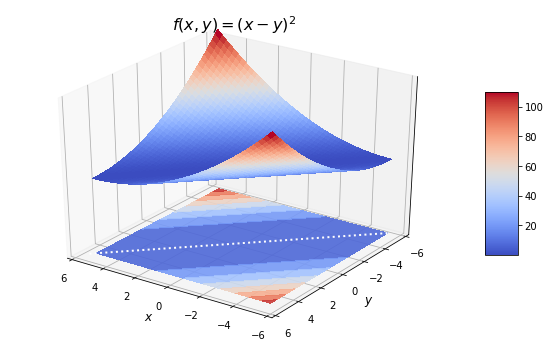

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

# Make data.
xmin, xmax, ymin, ymax, zmin, zmax = -5.5, 5.5, -5.5, 5.5, -100, 100
X = np.arange(xmin, xmax, 0.25)
Y = np.arange(ymin, ymax, 0.25)
X,Y = np.meshgrid(X, Y)
Z = (X-Y)**2


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot([xmin,xmax],[ymin,ymax],zmin, ls=':', lw=2, color='white')
ax.contourf(X, Y, Z, zdir='z', cmap=cm.coolwarm,  offset=zmin, alpha=0.9)


# Customize the z axis.
ax.set_zlim(zmin, zmax)
ax.set_zticks([])
ax.set_xlabel(r'$x$',fontsize='large')
ax.set_ylabel(r'$y$',fontsize='large')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('$f(x,y) = (x-y)^2$', fontsize=16)
ax.view_init(30,125) 
plt.show()

Taking partial derivative with $x$ as constant, 

$$
\dfrac{\partial f(x,y)}{\partial y} = \dfrac{\partial (x-y)^2}{\partial y} = 2(x-y)(-1) = -2(x-y)
$$

Assigning it to 0, we get, 
$$
-2(x-y) = 0 \implies (x - y) = 0 \implies x = y
$$

In fact that is what we observed in above diagram. The critical points are in fact a line defined by $x=y$ denoted by dotted white line above. Let us observe what happens for other possibility (we could already observe from graph, that it should result in same output $x=y$), there are no other critical lines. Taking partial derivative with $y$ as constant, 

$$
\dfrac{\partial f(x,y)}{\partial x} = \dfrac{\partial (x-y)^2}{\partial x} = 2(x-y)(1) = 2(x-y)
$$

Assigning it to 0, we get, 
$$
2(x-y) = 0 \implies (x - y) = 0 \implies x = y
$$

The same answer. Thus, we are able to mathematically find the critical point. Remember, the first derivative only tells it could be a critical point, not already maximum or minimum, that should be done after wards. In our case, from the graph we got the hint its a minimum, but not yet mathematically. 

### Second order Trap

However, we cannot just directly interpret second order partial derivatives for $f(x,y)$ like we did for one variable functions. In fact that would be inconclusive. Something more is needed. 

Let us try. We shall keep $y$ as constant, say $y=3$. Taking second order derivative, w.r.t $x$ 

$$
\dfrac{\partial^2 f(x,y)}{\partial x} = \dfrac{\partial^2 (x-y)^2}{\partial x} = \dfrac{\partial 2(x-y)}{\partial x} = 2 > 0
$$

This should mean, our function $f(x,y)$ should be increasing, but if you look at $y=3$ plane, you could observe that as $x$ is increasing, the function decreased. However, if you look at the plane $y=-3$, $f(x,y)$ is indeed seem to be increasing with $x$. This is illustrated in Fig $\ref{fig:RA03}$. 

\ 


Similarly, if we try to keep $x$ as constant, and take partial derivative w.r.t y, 

$$
\dfrac{\partial^2 f(x,y)}{\partial y} = \dfrac{\partial^2 (x-y)^2}{\partial y} = \dfrac{\partial -2(x-y)}{\partial x} = -2(-1) = 2 > 0
$$

Again we see a similar predicament. Observe for both $x=-3$ and $x=3$ as shown in Fig $\ref{fig:RA06}$. 

The inconclusivness is because, there is more to surfaces or two variable functions $f(x,y)$ compared to single variable ones. Apart from minium, maximum they also have saddle points. And the possible second order partial derivatives are not just two as we saw, but four as below. 

$$\begin{aligned}
f_{xx} = \dfrac{\partial f^2}{\partial x^2} \\
f_{yy} = \dfrac{\partial f^2}{\partial y^2} \\
f_{xy} = \dfrac{\partial f^2}{\partial x \partial y} = \dfrac{\partial f^2}{\partial y \partial x} 
\end{aligned}$$

Thus in case of surfaces, by making a first order partial differentiation w.r.t x and y, what we would get could also be a maximum or minimum or also a saddle point. The method to classify via second order as I just said, is little bit more involved. We will revisit and resume in future if needed, but for a quick dip on working that as well with an example, refer [here](http://personal.maths.surrey.ac.uk/S.Zelik/teach/calculus/max_min_2var.pdf)